# Sentiment Analysis

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
%matplotlib inline


## Read the NLP dataset tagged with communities

In [4]:
df = pd.read_csv("../network_analysis/df_nlp_louvain.csv")

In [5]:
df_filter = df.loc[(df["likes_count"]>=5) & (df["retweets_count"]>= 3)]
df = df_filter

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11908 entries, 6 to 174219
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          11908 non-null  object
 1   time                          11908 non-null  object
 2   name                          11908 non-null  object
 3   tweet                         11908 non-null  object
 4   mentions                      4470 non-null   object
 5   replies_count                 11908 non-null  int64 
 6   retweets_count                11908 non-null  int64 
 7   likes_count                   11908 non-null  int64 
 8   hashtags                      11763 non-null  object
 9   community                     11908 non-null  object
 10  original_community_extension  11908 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [7]:
df.community.value_counts()

community_1      1853
community_0      1649
community_2      1402
community_5       773
community_3       756
                 ... 
community_42        1
community_31        1
community_96        1
community_54        1
community_112       1
Name: community, Length: 87, dtype: int64

## Sentiment Analysis

In [13]:
analyser = SentimentIntensityAnalyzer()


In [14]:
pol = lambda x: analyser.polarity_scores(x)

In [15]:
df['compound'] = [analyser.polarity_scores(x)['compound'] for x in df['tweet']]
df['neg'] = [analyser.polarity_scores(x)['neg'] for x in df['tweet']]
df['neu'] = [analyser.polarity_scores(x)['neu'] for x in df['tweet']]
df['pos'] = [analyser.polarity_scores(x)['pos'] for x in df['tweet']]

In [24]:
df['sentiment_type']=''
df.loc[df.compound==0.05,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<= - 0.05,'sentiment_type']='NEGATIVE'

([<matplotlib.axis.XTick at 0x1a82d566760>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

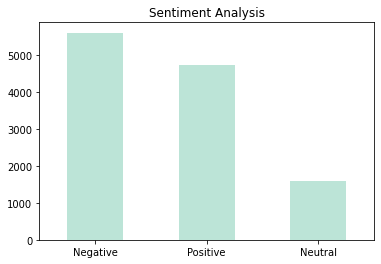

In [25]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "#BCE4D7")
plt.title("Sentiment Analysis")
plt.xticks(np.arange(3),["Negative", "Positive", "Neutral"], rotation = 0)

In [26]:
df.sentiment_type.value_counts()

NEGATIVE    5593
            4730
NEUTRAL     1585
Name: sentiment_type, dtype: int64

In [28]:
com5 = df_filter[df_filter["community"]=="community_5"]
com8 = df_filter[df_filter["community"]=="community_8"]
com3 = df_filter[df_filter["community"]=="community_3"]
com2 = df_filter[df_filter["community"]=="community_2"]




([<matplotlib.axis.XTick at 0x1a836ea5d90>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

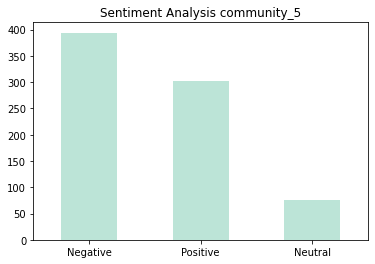

In [29]:
com5.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "#BCE4D7")
plt.title("Sentiment Analysis community_5")
plt.xticks(np.arange(3),["Negative", "Positive", "Neutral"], rotation = 0)

([<matplotlib.axis.XTick at 0x1a8305c26a0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

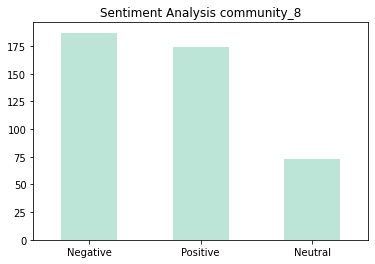

In [30]:
com8.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "#BCE4D7")
plt.title("Sentiment Analysis community_8")
plt.xticks(np.arange(3),["Negative", "Positive", "Neutral"], rotation = 0)

([<matplotlib.axis.XTick at 0x2ca28593880>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

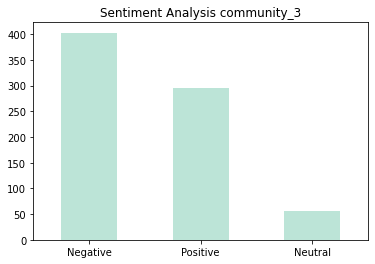

In [26]:
com3.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "#BCE4D7")
plt.title("Sentiment Analysis community_3")
plt.xticks(np.arange(3),["Negative", "Positive", "Neutral"], rotation = 0)

([<matplotlib.axis.XTick at 0x2ca2707bb80>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

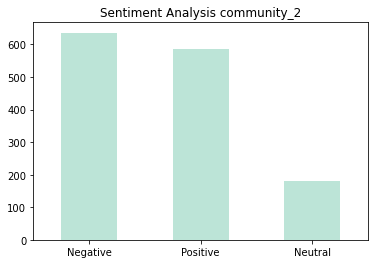

In [27]:
com2.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = "#BCE4D7")
plt.title("Sentiment Analysis community_2")
plt.xticks(np.arange(3),["Negative", "Positive", "Neutral"], rotation = 0)